# Importing the libraries


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Importing the data and exploring it

In [63]:
housing=pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Visualizing the dataframe

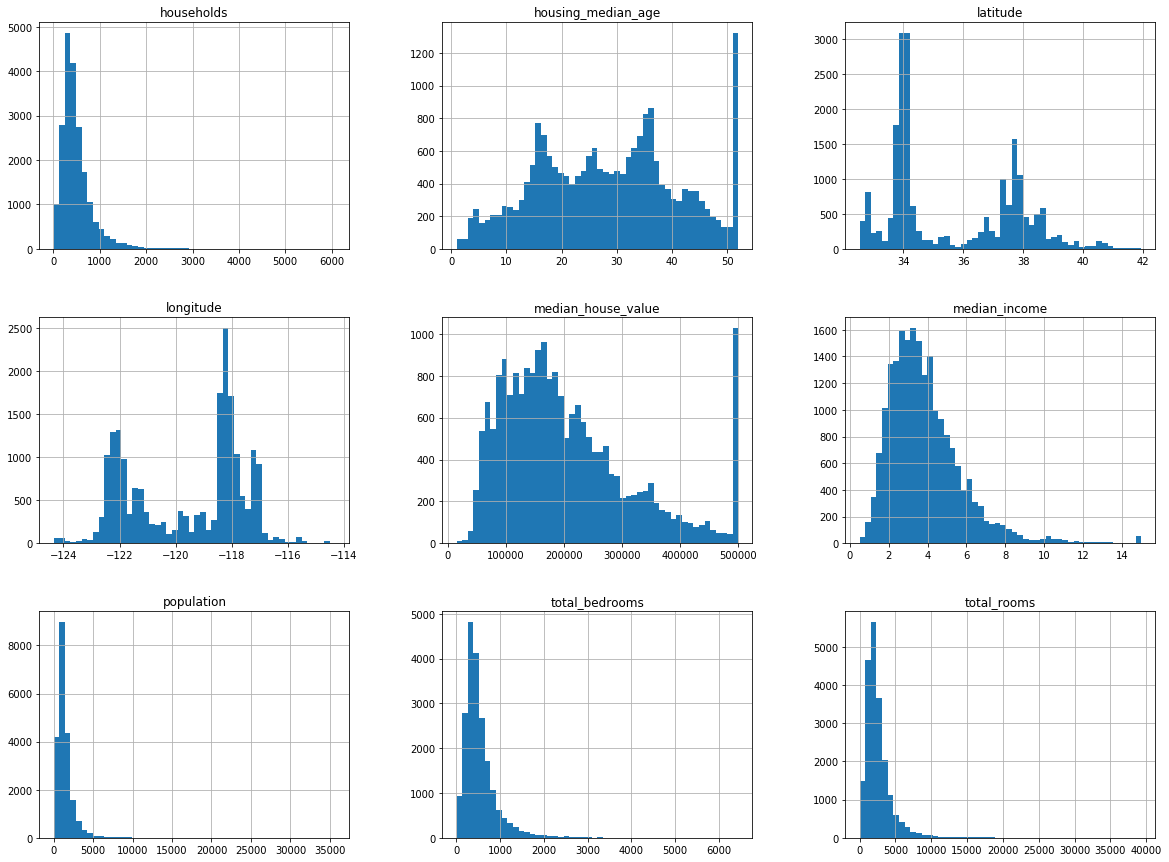

In [64]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [65]:
print("Description : ",housing.describe())

Description :            longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%  

# Extracting the input (X) and output (y) data from the dataset

In [66]:
X=housing.iloc[:,0:-1].values
y=housing.iloc[:,housing.shape[1]-1].values

# Checking the dataframe for any missing values 

In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In the following housing data,there is (20640-20433)=207 Missing values in the total_bedroom column,according to the problem we have to replace them with the mean

# Handle missing values with mean of the column

In [68]:
from sklearn.preprocessing import Imputer
missingValueImputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
X[:,2:-1]=missingValueImputer.fit_transform(X[:,2:-1])

In [69]:
pp=pd.DataFrame(X)
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
0    20640 non-null object
1    20640 non-null object
2    20640 non-null object
3    20640 non-null object
4    20640 non-null object
5    20640 non-null object
6    20640 non-null object
7    20640 non-null object
8    20640 non-null object
dtypes: object(9)
memory usage: 1.4+ MB


We can see that now there is no Missing Values

#  Visualizing Geographical Data


Take a look at the graph below a explain what do you see

* Each circle represent an districts and all the districts represent California
* Radius of each person represent the population of the district
* Red areas are expesive than blue areas, so we can point that areas next to the ocean are expensive

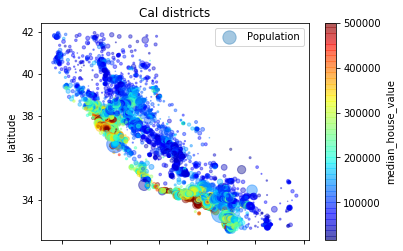

In [70]:
housing.plot(kind="scatter", x="longitude", y="latitude", title="Cal districts", alpha=0.4, 
             s=housing["population"]/100, label="Population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar="True")
plt.legend()

# Encode categorical data 


In [71]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder= LabelEncoder()
X[:,8]=X_labelencoder.fit_transform(X[:,8])
X[:,8]

array([3, 3, 3, ..., 1, 1, 1], dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder
#Instaciate a new encoder
X_onehotencoder=OneHotEncoder(categorical_features=[8])
X=X_onehotencoder.fit_transform(X).toarray()
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2200e+02, 1.2600e+02,
        8.3252e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.4010e+03, 1.1380e+03,
        8.3014e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.9600e+02, 1.7700e+02,
        7.2574e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.3870e+03, 5.3000e+02,
        2.3886e+00]])

# Split the dataset

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Perform feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
independent_scalar=StandardScaler()
X_train=independent_scalar.fit_transform(X_train)
X_test=independent_scalar.transform(X_test)

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
regressoragent = LinearRegression()

In [79]:
regressoragent.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
predictValues = regressoragent.predict(X_test)

In [81]:
predictValues 

array([212760.77266751, 288864.77266751, 179656.77266751, ...,
        89352.77266751, 255464.77266751, 214704.77266751])

In [83]:
#Accuracy of the model for training data 
regressoragent.score(X_train,y_train)

0.6469683695270487

In [84]:
# Accuracy of the model for testing data
regressoragent.score(X_test,y_test)

0.6382631089482038

In [85]:
y_pred = regressoragent.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
meanSquaredError=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:")
print(meanSquaredError)
c=sqrt(meanSquaredError)
print("RMSE={}".format(c))

Mean Squared Error:
4716885924.350961
RMSE=68679.58884815022


# Decision Tree Regression

In [86]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor (random_state = 0)

In [87]:
DTregressor.fit (X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [88]:
y_predict_train_DTregressor=DTregressor.predict(X_train)
y_predict_test_DTregressor=DTregressor.predict(X_test)

In [89]:
y_predict_test_DTregressor

array([139800., 267600., 160300., ..., 160900., 200600., 193600.])

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
modelPred = DTregressor.predict(X_test)
print(modelPred)
print("Number of predictions:",len(modelPred))

meanSquaredError=np.sqrt(mean_squared_error(y_test,y_predict_test_DTregressor))
print("Root Mean Squared Error:")
print(meanSquaredError)

[139800. 267600. 160300. ... 160900. 200600. 193600.]
Number of predictions: 4128
Root Mean Squared Error:
68281.727813103


# Random Forest Regression

In [91]:
from sklearn.ensemble import RandomForestRegressor
RFreg=RandomForestRegressor(random_state=0)
RFreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [92]:
y_predict_train_RFreg=RFreg.predict(X_train)
y_predict_test_RFreg=RFreg.predict(X_test)

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
modelPred = RFreg.predict(X_test)
print(modelPred)
print("Number of predictions:",len(modelPred))
meanSquaredError=np.sqrt(mean_squared_error(y_test,y_predict_test_RFreg))
print("Root Mean Squared Error:")
print(meanSquaredError)


[148350. 223320. 146480. ... 147190. 216660. 187540.]
Number of predictions: 4128
Root Mean Squared Error:
51045.40339130694
